

<p style="margin-right:8%; margin-left:8%; font-size:28px; font-weight: 200; line-height: 1.5em">
**Thrid Part: How to do an Analysis in Particle Physics?**

## Example 3: Fitting the Z mass peak
This last example is also divided in two parts: 

* Find out the invariant mass of the two pair mu+ mu- of candidates 
* Do a statistical analysis of the results ( Z mass, width,...).

(All code you are going to need is provided in Analyzer_Package, so you can access it as many times as you need and check in it your questions.)   

Once the histogram for the mass was created in the second part, we have implemented two different functions for fitting the Z mass peak. These functions are: 

1. Gaussian:

$$ G(x;\mu,\sigma) = \dfrac{1}{\sqrt{2\pi}\sigma}\exp[-\dfrac{(x-\mu)^{2}}{2\sigma^{2}}]    $$


2. Relativistic Breit-Wigner:

$$ B(m;M,\Gamma)= N * \dfrac{2}{\pi}*\dfrac{\Gamma^{2}M^{2}}{(m^{2}-M^{2})^{2} + m^{4}(\Gamma^{2}/M^{2})}   $$

To fit a generator-level Z peak a Breit-Wigner fit makes sense. However, reconstructed-level Z peaks have many detector resolutions that smear the Z mass peak. If the detector resolution is relatively poor, then it is usually good enough to fit a gaussian (since the gaussian detector resolution will overwhelm the inherent Briet-Wigner shape of the peak). If the detector resolution is fairly good, then another option is to fit a Breit-Wigner (for the inherent shape) convoluted with a gaussian (to describe the detector effects).This is in the "no-background" case. If you have backgrounds in your sample (Drell-Yan, cosmics, etc...), and you want to do the fit over a large mass range, then another function needs to be included to take care of this - an exponential is commonly used. 

In this exercise, we just use a function, created in the Histos.py script, which fits, automatically, the mass. 
 
**NOTE:** 

For each exercise, to run the code is necessary import **ROOT**.


In [1]:
# Import ROOT
import ROOT

Welcome to ROOTaaS 6.06/00


In [2]:
cd /home/jupyter/CmsOpenData/Analyzer_Package

/home/jupyter/CmsOpenData/Analyzer_Package


In [3]:
# Load the module Histos to call the appropiate functions for fitting the mass
from Histos import Histos
histos = Histos()

* ### Gaussian Fit

<ROOT.TH1F object ("g_mass") at 0x531e320>


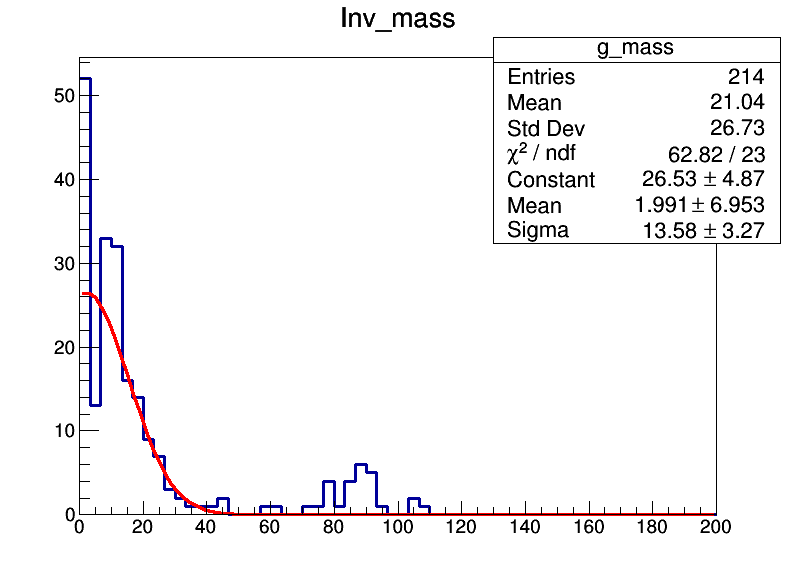

 FCN=62.8249 FROM MIGRAD    STATUS=CONVERGED     477 CALLS         478 TOTAL
                     EDM=3.21255e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.65316e+01   4.87326e+00   8.41401e-03  -1.68602e-04
   2  Mean         1.99073e+00   6.95329e+00   4.57768e-03  -2.15547e-04
   3  Sigma        1.35800e+01   3.27219e+00   4.60008e-05   2.26334e-03


Info in <TCanvas::Print>: png file ../output_histograms/g_mass.png has been created


In [4]:
histos.GaussianFit('mass')

* ### Breit Wigner

<ROOT.TH1F object ("g_mass") at 0x531e320>


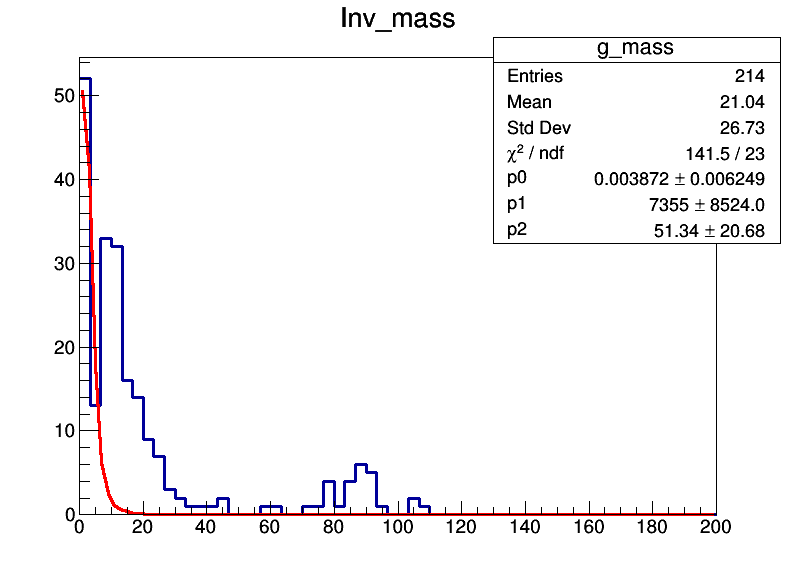

Info in <TCanvas::Print>: png file ../output_histograms/g_mass.png has been created


In [5]:
histos.BreitWignerFit('mass')

g_mass
[<ROOT.TH1F object ("g_mass") at 0x594ad70>]


TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: 


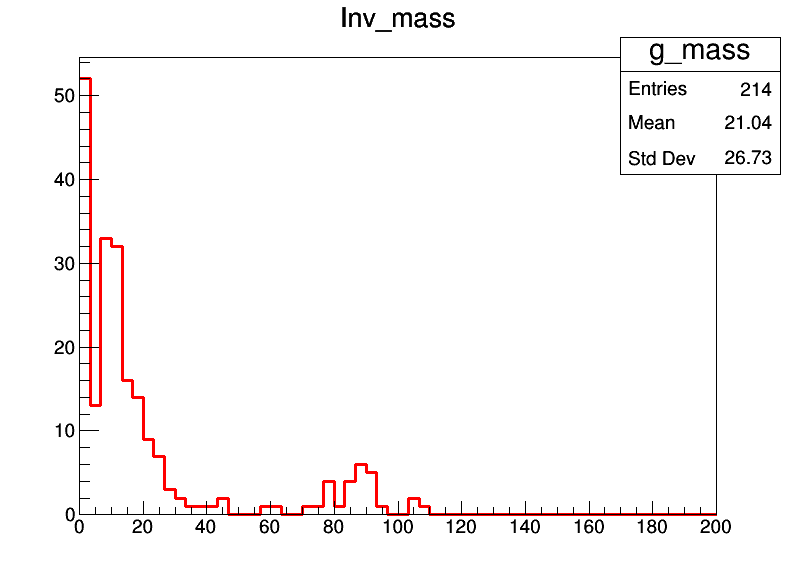

[<ROOT.TH1F object ("g_mass") at 0x594ad70>]


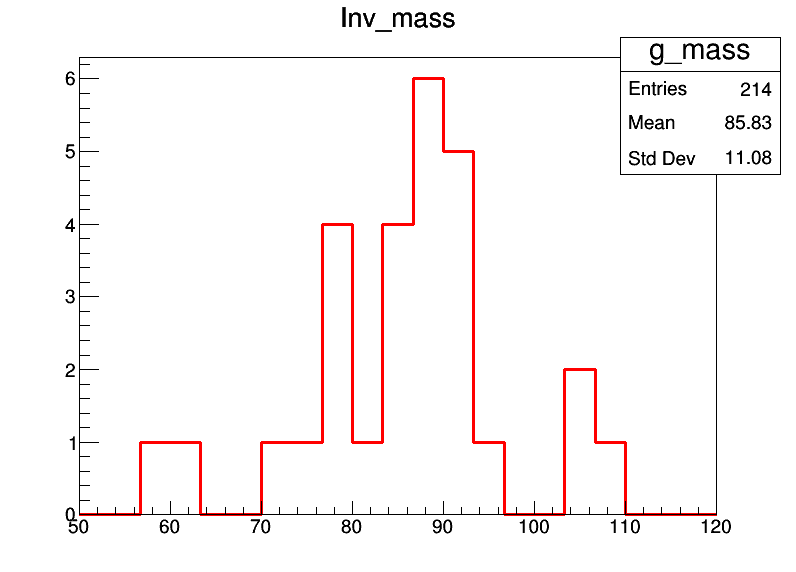

Info in <TCanvas::Print>: png file ../output_histograms/namess.png has been created
Info in <TCanvas::Print>: png file ../output_histograms/mass_60_120.png has been created


In [6]:
Zmass = Histos()
#Zmass.DrawHi('g_mass')

ZFit = Zmass.Setting('mass_60_120', 'g_mass', xlimits = (50,120))

In [8]:
ZFit.GaussianFit('mass')

AttributeError: 'NoneType' object has no attribute 'GaussianFit'